In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

### Data loading

In [2]:
fake_news = pd.read_csv('./data/Fake.csv')
true_news = pd.read_csv('./data/True.csv')

fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
# label the dataset
fake_news['label'] = 0
true_news['label'] = 1

# concat two dataset
df = pd.concat([fake_news,true_news])

# drop 'subject' column
df.drop(['subject'], axis=1)

df['text'] = df['title'] + ' ' + df['text']

df.shape
df.reset_index(inplace=True)

In [4]:
df.head()

,index,title,text,subject,date,label
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",0


<AxesSubplot:xlabel='label'>

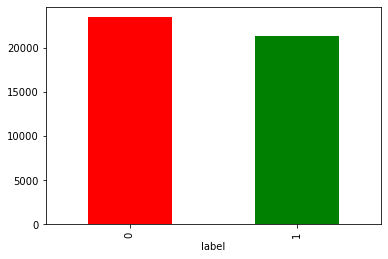

In [14]:
df.groupby('label').label.count().plot.bar(color=['r','g'])

### Data Cleaning 

In [15]:
import nltk
import re

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/nayem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/nayem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# list of stopwords for english
stopwords = nltk.corpus.stopwords.words("english")

In [17]:
import string
from nltk.tokenize import word_tokenize
ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()

def delete_punctuation(text):
    chars = []
    for char in text:
        if char not in string.punctuation:
            chars.append(char)
        else:
            chars.append(' ')
    return ''.join(chars)




def cleaning_and_processing_text(txt):
    
    # lower cased the text
    text = re.sub('[^a-zA-Z]',' ',txt)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\\W', ' ', text)
    text = re.sub('\n', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub(' $', '', text)
    text = delete_punctuation(text)
    text = text.lower()
    
    # remove stopwords, Stemming (remove -ing, -ly, ...) and Lemmatisation
    text = text.split()
    clean_text = [lem.lemmatize(word) for word in text if word not in stopwords]
    clean_text = [ps.stem(word) for word in clean_text]
    
    text = " ".join(clean_text)
    
    return text

In [ ]:
df['clean_text'] = df['text'].apply(lambda x: cleaning_and_processing_text(x))

In [ ]:
df.head()

In [14]:
df['clean_text'][:1].values

array(['donald trump send embarrass new year eve messag disturb donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news medium former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news medium happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news medium happi healthi new year great year america donald j trump realdonaldtrump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov alansandov 

### Text to Vectorize data


In [15]:
# sparse feature matrix from text using TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english') # params: max_features=500 can be used
vector_df = vectorizer.fit_transform(df['clean_text'])

In [16]:
vector_df.shape

(44898, 89469)

In [17]:
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaaaaaaand', 'aaaaackkk', 'aaaaapkfhk', 'aaaahhhh', 'aaaand', 'aaaarrgh', 'aaab', 'aaarf', 'aab', 'aaba', 'aabfsv', 'aabg', 'aabo', 'aaccord', 'aachen', 'aacnr', 'aadhaar', 'aadhar', 'aadl', 'aaf', 'aafn', 'aag', 'aagi', 'aagxdwkrjpq', 'aahd', 'aahi', 'aahwuhvvnh', 'aai', 'aaj', 'aaja', 'aal', 'aalberg', 'aalbert', 'aaldef', 'aaliyah', 'aamer', 'aamin', 'aammir', 'aamom', 'aamrrd', 'aan', 'aaofj', 'aaouj', 'aapa', 'aapi', 'aapl', 'aapq', 'aapxim', 'aar', 'aardal', 'aardvark', 'aargh', 'aarhu', 'aaron', 'aaronapollocamp', 'aaroncovfef', 'aaroncyn', 'aarondfordnv', 'aaronkaterski', 'aaronshhh', 'aaronson', 'aarp', 'aarti', 'aarushi', 'aaski', 'aasnd', 'aau', 'aaup', 'aax', 'aaxakdek', 'aayrvh', 'ab', 'aba', 'abaad', 'abaaoud', 'abaaouddinajpur', 'ababa', 'abacha', 'aback', 'abacu', 'abad', 'abadali', 'abadi', 'abadula', 'abair', 'aballa', 'abandon', 'abandonedh', 'abaond', 'abarib', 'abasaslani', 'abat', 'abatembo', 'abaya', 'abayomi', 'abb', 'abba', 'abballa', 'abballakab

In [18]:
# important features using TruncatedSVD
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=1000, n_iter=7) # best 1000 features
truncated_x = pd.DataFrame(svd.fit_transform(vector_df))

In [19]:
truncated_x

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.194312,-0.077871,0.057971,-0.027024,-0.085065,-0.038822,0.010765,0.020609,0.024266,-0.018175,...,0.006184,0.011226,-0.006669,0.012341,-0.011120,0.010101,-0.001603,0.012222,0.001311,0.007095
1,0.211187,-0.068116,0.079264,-0.002577,0.156105,-0.033311,-0.019430,0.008975,0.049284,0.010552,...,-0.015536,0.004926,-0.011430,0.018577,-0.012009,0.000769,-0.021719,-0.006782,-0.020077,0.005281
2,0.110803,-0.035249,0.018817,-0.090238,-0.030170,-0.002380,-0.060276,0.035838,0.047822,-0.063108,...,-0.006939,-0.020242,0.007509,0.003022,0.013747,0.006845,0.015344,0.007331,-0.000087,0.023492
3,0.154254,-0.089951,0.071072,-0.008792,-0.054331,-0.037402,-0.019257,0.018788,0.017338,0.008576,...,-0.023391,-0.005532,-0.014091,-0.033545,-0.020470,0.013085,0.005900,-0.008832,0.019154,0.005408
4,0.165238,0.027372,0.016471,-0.061235,-0.069005,-0.037412,0.027470,0.015865,-0.022493,0.033081,...,0.015821,0.000010,0.007549,0.013626,0.018257,-0.020935,0.006222,-0.013762,0.005285,-0.013623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,0.227782,0.094364,0.017352,-0.023057,-0.011350,-0.073485,0.066802,0.027046,-0.047380,0.048873,...,0.015331,-0.006555,-0.019454,0.016962,-0.009337,0.013568,0.003113,-0.003739,-0.001982,0.003525
44894,0.067848,0.060636,0.006914,0.006026,-0.008330,0.014841,0.005906,0.005872,0.056444,0.035778,...,0.000039,0.001220,0.017515,0.003766,0.000829,0.006131,-0.002887,0.007795,-0.007766,0.001108
44895,0.098698,0.052682,-0.032735,-0.037009,-0.009964,-0.003620,-0.005842,0.015552,0.018164,-0.004775,...,-0.012014,0.019838,-0.004282,-0.002988,-0.000400,-0.009137,0.001278,-0.004028,-0.012778,-0.003641
44896,0.113750,0.085623,0.039808,-0.012730,0.116740,-0.081600,0.015324,0.018341,-0.001878,-0.089592,...,0.000010,0.000224,-0.006333,-0.011382,0.004251,0.002073,-0.002049,-0.003224,0.000867,0.011876


In [20]:
df['label'].shape[0]

44898

In [21]:
#dataset = pd.concat([truncated_x, df['label']], axis=1)
#dataset

### Slipt Dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(truncated_x, df['label'], test_size=0.15, random_state=10)

In [23]:
y_train

3088     0
29061    1
27308    1
13480    0
24538    1
        ..
40059    1
28017    1
29199    1
40061    1
17673    0
Name: label, Length: 38163, dtype: int64

In [24]:
# new_X_train = tf.constant(X_train)
# new_X_test = tf.constant(X_test)
# new_y_train = tf.constant(y_train)
# new_y_test = tf.constant(y_test)
# new_X_train.shape

### Create dataset for tensorfow

In [25]:
def create_dataset(xs, ys, n_classes=10):
    return tf.data.Dataset.from_tensor_slices((xs, ys)) \
        .shuffle(len(ys)) \
        .batch(64)

In [26]:
train_dataset = create_dataset(X_train, y_train)
val_dataset = create_dataset(X_test, y_test)

### Model

In [27]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Reshape(target_shape=(1000,), input_shape=(1000,)),
    keras.layers.Dense(units=40, activation='relu'),
    keras.layers.Dense(units=20, activation='relu'),
    keras.layers.Dense(units=10, activation='relu'),
    keras.layers.Dense(units=5, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 40)                40040     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 41,131
Trainable params: 41,131
Non-trainable params: 0
____________________________________________________

### Training Model

In [29]:
model.compile(optimizer='SGD', 
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(), 
    epochs=10, 
    steps_per_epoch=500,
    validation_data=val_dataset.repeat(), 
    validation_steps=2
)

Epoch 1/10
500/500 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5144 - val_loss: 0.6953 - val_accuracy: 0.4688
Epoch 2/10
500/500 [==============================] - 0s 889us/step - loss: 0.6900 - accuracy: 0.5248 - val_loss: 0.6879 - val_accuracy: 0.5234
Epoch 3/10
500/500 [==============================] - 0s 862us/step - loss: 0.6846 - accuracy: 0.5304 - val_loss: 0.6791 - val_accuracy: 0.5469
Epoch 4/10
500/500 [==============================] - 0s 904us/step - loss: 0.6737 - accuracy: 0.6035 - val_loss: 0.6496 - val_accuracy: 0.6719
Epoch 5/10
500/500 [==============================] - 0s 848us/step - loss: 0.6419 - accuracy: 0.7452 - val_loss: 0.5740 - val_accuracy: 0.8828
Epoch 6/10
500/500 [==============================] - 0s 865us/step - loss: 0.5259 - accuracy: 0.8929 - val_loss: 0.3065 - val_accuracy: 0.9609
Epoch 7/10
500/500 [==============================] - 0s 734us/step - loss: 0.2683 - accuracy: 0.9385 - val_loss: 0.1481 - val_accuracy: 0